In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pickle
import seaborn as sbn
from joblib import dump, load

In [2]:
folder = 'ML-data-Central-Europe-gridded'

In [3]:
path = "O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/" + folder +  "/"

In [4]:
fire_season = True

if fire_season == True:
    # months to remove
    months = [1, 2, 3, 4, 5, 11, 12]
    season_name = 'fire-season'
else: 
    # months to remove
    months = [6, 7, 8, 9, 10]
    season_name = 'out-of-season'

In [5]:
loaded_model = pickle.load(open(path + 'results/all-predictors/RF_model_' + season_name + '.sav', 'rb'))
scaler =load(path + 'results/all-predictors/standard_scaler_' + season_name + '.bin')

### Test model on real data 

In [6]:
df = gpd.read_file(path + '/combined-static/static_predictors.shp')

In [7]:
df

,id,mean_elev,north,east,south,west,slope30,road_den,pline_den,urban,forest,agricultur,irrigated,shrubland,grassland,other,geometry
0,42.0,7.067822,0.379731,0.130583,0.379655,0.108954,0.000000,5809.525933,0.000955,0.594899,0.000000,0.106168,0.0,0.204033,0.000000,0.094899,"POLYGON ((3809789.394 3135937.078, 3801278.507..."
1,43.0,1.386238,0.389989,0.124017,0.348513,0.137362,0.000000,2271.961052,0.000278,0.146769,0.011090,0.729094,0.0,0.045830,0.049791,0.017427,"POLYGON ((3809789.394 3135937.078, 3809789.394..."
2,44.0,6.592371,0.378674,0.141092,0.354650,0.125573,0.000009,863.000000,0.000364,0.007558,0.000000,0.895080,0.0,0.004742,0.092620,0.000000,"POLYGON ((3809789.394 3125937.078, 3809789.394..."
3,45.0,19.688050,0.472356,0.118029,0.266595,0.143007,0.000000,1210.000000,0.000394,0.067553,0.031241,0.856262,0.0,0.000000,0.044944,0.000000,"POLYGON ((3809789.394 3115937.078, 3809789.394..."
4,46.0,34.843144,0.514495,0.118132,0.241339,0.126065,0.003554,1126.396554,0.000216,0.000000,0.003467,0.979889,0.0,0.000000,0.016644,0.000000,"POLYGON ((3809789.394 3105937.078, 3809789.394..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,34121.0,0.106896,0.558465,0.101036,0.223603,0.116264,0.010259,100.000000,0.000124,0.010710,0.000000,0.030790,0.0,0.000000,0.000000,0.958501,"POLYGON ((5849789.394 2645937.078, 5849789.394..."
17339,34122.0,-0.007136,0.603465,0.103113,0.192992,0.099043,0.006311,10.841880,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.034902,0.965098,"POLYGON ((5851221.243 2645937.078, 5852155.049..."
17340,34123.0,0.851959,0.371575,0.167176,0.288838,0.171623,0.004255,0.217285,0.000291,0.000000,0.061925,0.000000,0.0,0.307502,0.399151,0.231423,"POLYGON ((5852155.049 2635937.078, 5853088.856..."
17341,34124.0,0.069657,0.368346,0.151503,0.311709,0.168561,0.003831,581.870867,0.000115,0.029456,0.039572,0.000000,0.0,0.077655,0.166915,0.686403,"POLYGON ((5853088.856 2625937.078, 5853537.062..."


In [8]:
#df = gpd.read_file(path + '/grid/europe_10km_grid.shp')

#### Select dates to plot the ignition probability 

In [9]:
dates = pd.date_range('2008-01-07', '2023-12-24') # all dates apart from first 7 or first last due to rolling means and sums on 7 days
dates = dates[ ~((dates.month == 2) & (dates.day == 29))] # remove leap days

for m in months:
    dates = dates[ ~(dates.month == m)] 
len_dates = len(dates)
print(len_dates)

2448


#### Assign corresponding FWI values

In [10]:
#fwi_file = pd.read_csv(path + 'FWI/fwi-2000-2020.csv')
temp_file = pd.read_csv(path + 'weather/temp-2008-2023.csv')
wind_file = pd.read_csv(path + 'weather/wind-2008-2023.csv')
rhum_file = pd.read_csv(path + 'weather/rhum-2008-2023.csv')

#soil_file = pd.read_csv(path + 'weather/swvl1-2020-2023.csv')

In [11]:
prcp_file = pd.read_csv(path + 'weather/prcp-2008-2023.csv')

In [12]:
#fwi_file['id'] = fwi_file.id.astype('int32')
#fwi_file = fwi_file.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'NAME_2', 'NAME_3', 'geometry', 'centre', 'i', 'j', 'lon', 'lat', 'fwi'])
#fwi_file = fwi_file.set_index(['id'])

In [13]:
temp_file['id'] = temp_file.id.astype('int32')
temp_file = temp_file.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'centre', 'i', 'j', 'lon', 'lat', 'fwi'])
temp_file = temp_file.set_index(['id'])
temp_file_mean = temp_file.copy()
temp_file_mean = temp_file_mean.rolling(7, axis = 1).mean()

C:\Users\ophme\AppData\Local\Temp\ipykernel_31508\1391596636.py:5: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  temp_file_mean = temp_file_mean.rolling(7, axis = 1).mean()


In [14]:
wind_file['id'] = wind_file.id.astype('int32')
wind_file = wind_file.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'centre', 'i', 'j', 'lon', 'lat', 'fwi'])
wind_file = wind_file.set_index(['id'])


In [15]:
rhum_file['id'] = rhum_file.id.astype('int32')
rhum_file = rhum_file.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'centre', 'i', 'j', 'lon', 'lat', 'fwi'])
rhum_file = rhum_file.set_index(['id'])


In [16]:
#soil_file['id'] = soil_file.id.astype('int32')
#soil_file = soil_file.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0',  'geometry', 'centre', 'i', 'j', 'lon', 'lat', 'fwi'])
#soil_file = soil_file.set_index(['id'])

In [17]:
prcp_file['id'] = prcp_file.id.astype('int32')
prcp_file = prcp_file.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'centre', 'i', 'j', 'lon', 'lat', 'fwi'])
prcp_file = prcp_file.set_index(['id'])
prcp_file_sum = prcp_file.copy()
prcp_file_sum = prcp_file_sum.rolling(7, axis = 1).sum()

prcp_file_long_sum = prcp_file.copy()
prcp_file_long_sum = prcp_file_long_sum.rolling(28, axis = 1).sum()


C:\Users\ophme\AppData\Local\Temp\ipykernel_31508\4214859945.py:5: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  prcp_file_sum = prcp_file_sum.rolling(7, axis = 1).sum()
C:\Users\ophme\AppData\Local\Temp\ipykernel_31508\4214859945.py:8: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  prcp_file_long_sum = prcp_file_long_sum.rolling(28, axis = 1).sum()


In [18]:
df_probs = df.copy()

In [19]:
df = df.set_index('id')

In [20]:
df = df.drop(columns = ['geometry'])

In [21]:
weather_vars = ['temp', 'wind', 'rhum', 'prcp', 'prcp_sum_7day', 'prcp_sum_28day']
from IPython.display import clear_output

for date in dates:
    print(date)
    year = str(date)[:4]
    month = str(date)[5:7]
    day = str(date)[8:10]
    day = str(int(day) -1)
    
    #fwi_vals = fwi_file.loc[:, [year + month + day ]]
  #  fwi_vals = fwi_vals.rename(columns = {year + month + day : 'fwi'})
  #  df = df.join(fwi_vals)

    temp_vals = temp_file.loc[:, [year + month + day ]]
    temp_vals = temp_vals.rename(columns = {year + month + day : 'temp'})
    df = df.join(temp_vals)

    #temp_vals_mean = temp_file_mean.loc[:, [year + month + day ]]
    #temp_vals_mean = temp_vals_mean.rename(columns = {year + month + day : 'temp_mean_7day'})
    #df = df.join(temp_vals_mean)

    wind_vals = wind_file.loc[:, [year + month + day ]]
    wind_vals = wind_vals.rename(columns = {year + month + day : 'wind'})
    df = df.join(wind_vals)

    rhum_vals = rhum_file.loc[:, [year + month + day ]]
    rhum_vals = rhum_vals.rename(columns = {year + month + day : 'rhum'})
    df = df.join(rhum_vals)

    prcp_vals = prcp_file.loc[:, [year + month + day ]]
    prcp_vals = prcp_vals.rename(columns = {year + month + day : 'prcp'})
    df = df.join(prcp_vals*0)
    
    prcp_vals_sum = prcp_file_sum.loc[:, [year + month + day ]]
    prcp_vals_sum = prcp_vals_sum.rename(columns = {year + month + day : 'prcp_sum_7day'})
    df = df.join(prcp_vals_sum)

    prcp_vals_long_sum = prcp_file_long_sum.loc[:, [year + month + day ]]
    prcp_vals_long_sum = prcp_vals_long_sum.rename(columns = {year + month + day : 'prcp_sum_28day'})
    df = df.join(prcp_vals_long_sum)
    
    #soil_vals = soil_file.loc[:, [year + month + day ]]
    #soil_vals = soil_vals.rename(columns = {year + month + day : 'soil_water'})
    #df = df.join(soil_vals)

    X_vals = df.copy()
    X_vals = X_vals.loc[:,list(scaler.feature_names_in_)]
    # X_vals = X_vals.drop(columns = ['geometry', 'max_elevat', 'north', 'temp_mean_7day'])
    X_vals_scaled = scaler.transform(X_vals)
    pred = loaded_model.predict_proba(X_vals_scaled)

    for var in weather_vars:
        try:
            df = df.drop(columns = [var])
        except Exception as e:
            print(e)
 

    df_probs[year + month + day] = pred[:,1]
    clear_output(wait = True)
    


2023-10-31 00:00:00


C:\Users\ophme\AppData\Local\anaconda3\envs\wildfire\Lib\site-packages\geopandas\geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [22]:
#df_probs.iloc[:, len(df.columns) + 1:len(dates)+len(df.columns)+1]

In [23]:
#df_probs = df_probs.drop(columns = ['mean', 'sum'])
#df_probs = df_probs.drop(columns = ['road', 'night_ligh', 'mean_eleva', 'max_elevat', 'slope30', 'north', 'east', 'south'])
#df_probs = df_probs.drop(columns = ['powerline',	'west',	'forest',	'shrub',	'grass',	'other',	'agri',	'agriNA',	'wui'])
#df_probs

In [24]:
df_save = pd.DataFrame(df_probs.iloc[:, len(df.columns) + 2:])

In [25]:
df_save = df_save.set_index(df.index)

In [26]:
df_save.to_csv(path + 'results/all-predictors/daily_probas_2008-2023_' + season_name + '.csv')

In [27]:
#df_probs.loc[:, ['geometry', '20190819']].to_file( path + 'results/all-predictors/daily_probas_20190820_' + season_name + '.shp' )

In [28]:
#df_probs.to_file( path + 'results/all-predictors/daily_probas_2008-2023_' + season_name + '.shp' )

In [29]:
df_probs.iloc[:, len(df.columns) + 2:]

,2008060,2008061,2008062,2008063,2008064,2008065,2008066,2008067,2008068,2008069,...,20231021,20231022,20231023,20231024,20231025,20231026,20231027,20231028,20231029,20231030
0,0.335,0.385,0.345,0.345,0.340,0.350,0.350,0.350,0.405,0.415,...,0.355,0.360,0.375,0.370,0.350,0.350,0.340,0.345,0.320,0.335
1,0.180,0.180,0.160,0.120,0.130,0.120,0.140,0.135,0.150,0.160,...,0.165,0.160,0.190,0.150,0.150,0.140,0.135,0.175,0.135,0.120
2,0.165,0.155,0.155,0.150,0.145,0.135,0.120,0.130,0.115,0.125,...,0.155,0.170,0.190,0.165,0.170,0.145,0.125,0.180,0.155,0.135
3,0.125,0.125,0.100,0.090,0.095,0.080,0.070,0.075,0.060,0.065,...,0.125,0.125,0.120,0.120,0.125,0.105,0.080,0.115,0.110,0.085
4,0.180,0.175,0.160,0.150,0.160,0.145,0.140,0.165,0.140,0.145,...,0.175,0.170,0.180,0.170,0.175,0.140,0.135,0.180,0.180,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,0.615,0.580,0.565,0.575,0.570,0.570,0.580,0.635,0.645,0.730,...,0.695,0.620,0.555,0.470,0.570,0.565,0.675,0.665,0.660,0.410
17339,0.630,0.560,0.565,0.570,0.605,0.610,0.600,0.535,0.570,0.615,...,0.610,0.565,0.365,0.355,0.390,0.370,0.555,0.555,0.465,0.325
17340,0.800,0.780,0.820,0.725,0.800,0.795,0.805,0.810,0.780,0.790,...,0.800,0.820,0.670,0.685,0.695,0.705,0.820,0.830,0.720,0.675
17341,0.720,0.750,0.785,0.695,0.795,0.775,0.800,0.835,0.845,0.830,...,0.830,0.920,0.685,0.745,0.750,0.755,0.885,0.870,0.710,0.715


In [30]:
df_probs['mean'] = df_probs.iloc[:, len(df.columns) + 2:].mean(axis = 1)

C:\Users\ophme\AppData\Local\anaconda3\envs\wildfire\Lib\site-packages\geopandas\geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


<Axes: >

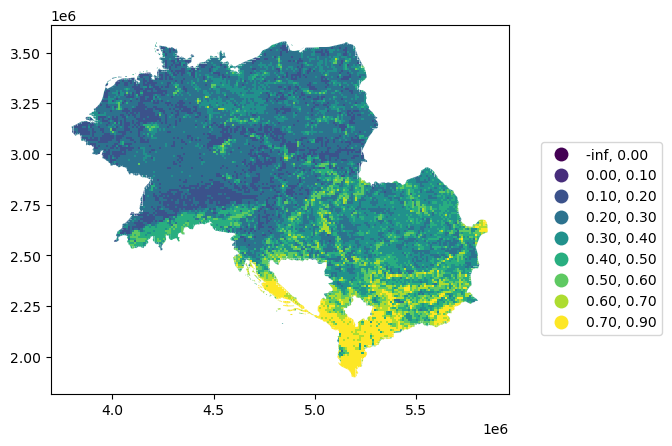

In [31]:
df_probs.plot(column = 'mean', scheme="User_Defined", classification_kwds=dict(bins= np.arange(0, 0.8, 0.1)),  legend_kwds={'bbox_to_anchor': (1.35, 0.7)}, legend = True)

In [32]:
df_probs.loc[:,['mean', 'geometry']].to_file(path + 'results/all-predictors/mean_prob_2008-2023_' +  season_name + '.shp')